In [2]:
from manim import *

Manim Community v0.17.2

In [20]:
%%manim -ql PairedDesign
from my_course.my_config import *
from my_course.my_func import *
import random
class PairedDesign(Scene):
    config['tex_template'] = TexTemplateLibrary.ctex
    multi_play = MultiPlay.multi_play
    def title(self):
        footnote = foot(c='完全随机设计与配对设计')
        self.camera.background_color=c_white
        self.add(footnote)
        title = Text('完全随机设计与配对设计',font_size=60,font='STKaiti',color=c_blue)
        title1 = Text('《医学统计学》',font_size=48,font='STKaiti',color=c_blue).to_edge(UL)
        title2 = Text('公共卫生学院',font_size=48,font='STKaiti',color=c_blue).to_edge(DR)
        self.add(title,title1,title2)
        # self.wait(2)
        # self.play(FadeOut(title,title1,title2))
        self.remove(title,title1,title2)
    def create_random(self,sample_mob,seed=123456,paired=False):
        random.seed(seed)
        random_num = []
        random_mob = VGroup()
        for i in range(20):
            tm = random.randint(10,99)
            random_num.append(tm)
            mob = Integer(tm)
            mob.next_to(sample_mob[i])
            random_mob.add(mob)
        critical_value = np.median(random_num)

        groupa_parity = VGroup()
        groupb_parity = VGroup()
        groupa_size = VGroup()
        groupb_size = VGroup()
        randoma_parity_rect = VGroup()
        randomb_parity_rect = VGroup()
        randoma_size_rect = VGroup()
        randomb_size_rect = VGroup()
        for i in range(20):
            if random_num[i] % 2 == 1:
                groupa_parity.add(sample_mob[i].copy())
                randoma_parity_rect.add(BackgroundRectangle(random_mob[i],color=c_red,fill_opacity=0.6))
            else:
                groupb_parity.add(sample_mob[i].copy())
                randomb_parity_rect.add(BackgroundRectangle(random_mob[i],color=c_green,fill_opacity=0.6))
            if random_num[i] < critical_value:
                groupa_size.add(sample_mob[i].copy())
                randoma_size_rect.add(BackgroundRectangle(random_mob[i],color=c_red,fill_opacity=0.6))
            else:
                groupb_size.add(sample_mob[i].copy())
                randomb_size_rect.add(BackgroundRectangle(random_mob[i],color=c_green,fill_opacity=0.6))
        groupa_paired = VGroup()
        groupb_paired = VGroup()
        randoma_paired_rect = VGroup()
        randomb_paired_rect = VGroup()
        for i in range(0,20,2):
            j = i+1
            if random_num[i] < random_num[j]:
                groupa_paired.add(sample_mob[i].copy())
                groupb_paired.add(sample_mob[j].copy())
                randoma_paired_rect.add(BackgroundRectangle(random_mob[i],color=c_red,fill_opacity=0.6))
                randomb_paired_rect.add(BackgroundRectangle(random_mob[j],color=c_green,fill_opacity=0.6))
            else:
                groupa_paired.add(sample_mob[j].copy())
                groupb_paired.add(sample_mob[i].copy())
                randoma_paired_rect.add(BackgroundRectangle(random_mob[j],color=c_red,fill_opacity=0.6))
                randomb_paired_rect.add(BackgroundRectangle(random_mob[i],color=c_green,fill_opacity=0.6))

        if paired == False:
            return random_mob,groupa_parity,groupb_parity,groupa_size,groupb_size,randoma_parity_rect,randomb_parity_rect,randoma_size_rect,randomb_size_rect
        else:
            return random_mob,groupa_paired,groupb_paired,randoma_paired_rect,randomb_paired_rect

    def cr_design(self):
        cr_design_title = Text('完全随机设计',color=c_blue).to_edge(UL)
        cr_design = Paragraph('受试对象的分组完全由随机数字（随机数字表、抽签、计',
                              '算机生成伪随机数等）来决定，也称独立样本、成组设计',
                              line_spacing=0.7,
                              t2c={'独立样本':c_blue,'成组设计':c_blue})
        cr_design.next_dl(cr_design_title[1])
        example = Tex('例1.将20只小鼠随机分配到“甲”、“乙”两组').next_dl(cr_design_title[1])
        step1 = Tex('1.将受试对象编号').next_dl(example[0][1])
        step2 = Tex('2.生成随机数字').next_dl(step1)
        step3 = Tex('3.规定分组规则').next_dl(step2)
        step3_1 = Tex('单数甲组，双数乙组').next_dl(step3[0][1])
        step3_1[0][0:2].set(color=c_red)
        step3_1[0][5:7].set(color=c_green)
        step3_2 = Tex('较小甲组，较大乙组').next_dl(step3_1)
        step3_2[0][0:2].set(color=c_red)
        step3_2[0][5:7].set(color=c_green)
        step4 = Tex('4.确定分组').next_dl(step3_2).align_to(step2,LEFT)
        sample_mob = VGroup(*[Text('小鼠0'+str(i)) if i<10 else Text('小鼠'+str(i)) for i in range(1,21)])
        sample_mob.arrange_in_grid(cols=2,buff=(1.25,0.15)).scale(0.8)
        sample_mob.to_edge(DOWN)

        random_mob,groupa_parity,groupb_parity,groupa_size,groupb_size,randoma_parity_rect,randomb_parity_rect,randoma_size_rect,randomb_size_rect = self.create_random(sample_mob)

        random_mob.set_height(sample_mob.get_height())
        sample_title1 = Tex(r'样本\\编号').next_to(sample_mob[0],UP,buff=0.15)
        sample_title2 = Tex(r'样本\\编号').next_to(sample_mob[1],UP,buff=0.15)
        random_title1 = Tex(r'随机\\数字').next_to(random_mob[0],UP,buff=0.15)
        random_title2 = Tex(r'随机\\数字').next_to(random_mob[1],UP,buff=0.15)
        groupb_title = Tex('乙组').to_edge(UR).set(color=c_green)
        groupa_title = Tex('甲组').set(color=c_red).next_to(groupb_title,LEFT,buff=1.5)

        groupa_parity.arrange_in_grid(cols=1,buff=0.1).next_to(groupa_title,DOWN)
        groupb_parity.arrange_in_grid(cols=1,buff=0.1).next_to(groupb_title,DOWN)
        groupa_size.arrange_in_grid(cols=1,buff=0.1).next_to(groupa_title,DOWN)
        groupb_size.arrange_in_grid(cols=1,buff=0.1).next_to(groupb_title,DOWN)

        feature1 = Tex('1.分组完全由随机数字决定','(完全随机设计)').next_dl(cr_design_title[1])
        feature2 = Tex('2.以组为单位进行分析','(成组设计)').next_dl(feature1)
        feature3 = Tex('3.两组数据完全独立','(独立样本)').next_dl(feature2)
        feature3_1 = Tex('各组内部数据顺序任意变化').next_dl(feature3[0][1])
        feature3_2 = Tex('对分析结果没有任何影响').next_dl(feature3_1)
        feature1[1].set(color=c_blue)
        feature2[1].set(color=c_blue)
        feature3[1].set(color=c_blue)
        groupa_rect = SurroundingRectangle(groupa_size,color=c_red)
        groupb_rect = SurroundingRectangle(groupb_size,color=c_green)
        groupa_mean = Tex(r'$\bar x_{\tiny \mbox{甲组}}$').next_to(groupa_rect,DOWN,buff=0.50)
        groupa_std  = Tex(r'$S_{\tiny \mbox{甲组}}$').next_to(groupa_mean,DOWN)
        groupa_stat = VGroup(groupa_mean,groupa_std).set(color=c_red)
        groupb_mean = Tex(r'$\bar x_{\tiny \mbox{乙组}}$').next_to(groupb_rect,DOWN,buff=0.50)
        groupb_std  = Tex(r'$S_{\tiny \mbox{乙组}}$').next_to(groupb_mean,DOWN)
        groupa_stat = VGroup(groupb_mean,groupb_std).set(color=c_green)

        ani_list = [
            [FadeIn(cr_design_title)],
            [FadeIn(cr_design)],
            [FadeOut(cr_design)],
            [FadeIn(example)],
            [FadeIn(step1)],
            [FadeIn(sample_title1,sample_title2)],
            [FadeIn(sample_mob)],
            [FadeIn(step2)],
            [FadeIn(random_title1,random_title2)],
            [FadeIn(random_mob)],
            [FadeIn(step3)],
            [FadeIn(step3_1)],
            [FadeIn(groupa_title)],
            [FadeIn(groupb_title)],
            [FadeIn(step4)],
            [FadeIn(randoma_parity_rect)],
            [FadeIn(groupa_parity)],
            [FadeIn(randomb_parity_rect)],
            [FadeIn(groupb_parity)],
            [FadeOut(groupa_parity,groupb_parity,randoma_parity_rect,randomb_parity_rect)],
            [FadeIn(step3_2)],
            [FadeIn(randoma_size_rect)],
            [FadeIn(groupa_size)],
            [FadeIn(randomb_size_rect)],
            [FadeIn(groupb_size)],
            [FadeOut(example,step1,step2,step3,step4,sample_title1,sample_title2,random_title1,random_title2,sample_mob,random_mob,
                     randoma_size_rect,randomb_size_rect,step3_1,step3_2)],
            [FadeIn(feature1[0])],
            [FadeIn(feature1[1])],
            [FadeIn(feature2[0])],
            [FadeIn(feature2[1])],
            [FadeIn(groupa_rect)],
            [FadeIn(groupa_mean)],
            [FadeIn(groupa_std)],
            [FadeIn(groupb_rect)],
            [FadeIn(groupb_mean)],
            [FadeIn(groupb_std)],
            [FadeIn(feature3[0])],
            [FadeIn(feature3[1])],
            [FadeIn(feature3_1)],
            [FadeIn(feature3_2)],
        ]
        # change_list = [i for i in range(3,13)]+[16,20,21,22]
        # time_list = change_time(len(ani_list),change_list)
        self.multi_play(ani_list)
        for _ in range(len(groupa_size)):
            self.play(CyclicReplace(*groupa_size))
        self.wait()
    def pr_design(self):
        pr_design = Text('配对设计（相关样本）',color=c_blue).to_edge(UL)
        example = Tex('例2.将20只小鼠按配对设计（体重）分配到“甲”、“乙”两组').next_dl(pr_design[1])
        step1 = Tex('1.将受试对象编号').next_dl(example[0][1])
        step2 = Tex('2.按因素匹配成对').next_dl(step1)
        step2_1 = Tex('按体重接近原则配对').next_dl(step2[0][1])
        step3 = Tex('3.生成随机数字').next_to(step2_1,DOWN).align_to(step2,LEFT)
        step4 = Tex('4.确定分组规则').next_dl(step3).align_to(step2,LEFT)
        step4_1 = Tex('较小甲组，较大乙组').next_dl(step4)
        step4_1[0][0:2].set(color=c_red)
        step4_1[0][5:7].set(color=c_green)
        id = [i for i in range(1,21)]
        random.seed(123456)
        random.shuffle(id)
        sample_mob_0 = VGroup(*[Text('小鼠0'+str(i)) if i<10 else Text('小鼠'+str(i)) for i in range(1,21)])
        sample_mob_0.arrange_in_grid(cols=2,buff=(1.25,0.15)).scale(0.8)
        sample_mob_0.to_edge(DOWN)
        sample_mob = VGroup(*[Text('小鼠0'+str(i)) if i<10 else Text('小鼠'+str(i)) for i in id])
        sample_mob.arrange_in_grid(cols=2,buff=(1.25,0.15)).scale(0.8)
        sample_mob.to_edge(DOWN)

        random_mob,groupa_paired,groupb_paired,randoma_paired_rect,randomb_paired_rect = self.create_random(sample_mob,paired=True)     

        sample_title1 = Tex(r'样本\\编号').next_to(sample_mob[0],UP,buff=0.15)
        sample_title2 = Tex(r'样本\\编号').next_to(sample_mob[1],UP,buff=0.15)
        random_title1 = Tex(r'随机\\数字').next_to(random_mob[0],UP,buff=0.15)
        random_title2 = Tex(r'随机\\数字').next_to(random_mob[1],UP,buff=0.15)
        groupb_title = Tex('乙组').to_edge(UR).set(color=c_green)
        groupa_title = Tex('甲组').set(color=c_red).next_to(groupb_title,LEFT,buff=1.5)

        groupa_paired.arrange_in_grid(cols=1,buff=0.1).next_to(groupa_title,DOWN)
        groupb_paired.arrange_in_grid(cols=1,buff=0.1).next_to(groupb_title,DOWN)

        # feature1 = Tex('1.分组完全由随机数字决定','(完全随机设计)').next_dl(cr_design_title[1])
        # feature2 = Tex('2.以组为单位进行分析','(成组设计)').next_dl(feature1)
        # feature3 = Tex('3.两组数据完全独立','(独立样本)').next_dl(feature2)
        # feature3_1 = Tex('各组内部数据顺序任意变化').next_dl(feature3[0][1])
        # feature3_2 = Tex('对分析结果没有任何影响').next_dl(feature3_1)
        # feature1[1].set(color=c_blue)
        # feature2[1].set(color=c_blue)
        # feature3[1].set(color=c_blue)
        # groupa_rect = SurroundingRectangle(groupa_size,color=c_red)
        # groupb_rect = SurroundingRectangle(groupb_size,color=c_green)
        # groupa_mean = Tex(r'$\bar x_{\tiny \mbox{甲组}}$').next_to(groupa_rect,DOWN,buff=0.50)
        # groupa_std  = Tex(r'$S_{\tiny \mbox{甲组}}$').next_to(groupa_mean,DOWN)
        # groupa_stat = VGroup(groupa_mean,groupa_std).set(color=c_red)
        # groupb_mean = Tex(r'$\bar x_{\tiny \mbox{乙组}}$').next_to(groupb_rect,DOWN,buff=0.50)
        # groupb_std  = Tex(r'$S_{\tiny \mbox{乙组}}$').next_to(groupb_mean,DOWN)
        # groupa_stat = VGroup(groupb_mean,groupb_std).set(color=c_green)

        ani_list = [
            [FadeIn(pr_design)],
            [FadeIn(example)],
            [FadeIn(step1)],
            [FadeIn(sample_title1,sample_title2)],
            [FadeIn(sample_mob_0)],
            [FadeIn(step2)],
            [FadeIn(step2_1)],
            [TransformMatchingShapes(sample_mob_0,sample_mob)],
            [FadeIn(step3)],
            [FadeIn(random_title1,random_title2)],
            [FadeIn(random_mob)],
            [FadeIn(groupa_title,groupb_title),FadeOut(example)],
            [FadeIn(randoma_paired_rect)],
            [FadeIn(groupa_paired)],
            [FadeIn(randomb_paired_rect)],
            [FadeIn(groupb_paired)],
            [FadeOut(sample_mob)],
        ]
        self.multi_play(ani_list)
    def construct(self):
        # self.title()
        self.cr_design()
        self.clear()
        self.pr_design()        

        self.wait()



        




<string>:97: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.
<string>:97: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().


[05/14/23 10:40:14] INFO     Animation 0 : Partial movie file written in                   ]8;id=63784;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=461581;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2578476628_                         
                             1832856294_223132457.mp4'                                                             

[05/14/23 10:40:15] INFO     Animation 1 : Partial movie file written in                   ]8;id=922496;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=528390;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             2094242835_3301497709.mp4'                                                            

[05/14/23 10:40:16] INFO     Animation 2 : Partial movie file written in                   ]8;id=45607;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=112147;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             517957483_3654588610.mp4'                                                             

                    INFO     Animation 3 : Partial movie file written in                   ]8;id=527634;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=702043;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             172116300_3301497709.mp4'                                                             

                    INFO     Animation 4 : Partial movie file written in                   ]8;id=834264;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=355093;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             2501604176_1371977545.mp4'                                                            

[05/14/23 10:40:17] INFO     Animation 5 : Partial movie file written in                   ]8;id=807519;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=651367;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             2094582675_777403288.mp4'                                                             

                    INFO     Animation 6 : Partial movie file written in                   ]8;id=257574;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=957068;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             1050737235_3487431668.mp4'                                                            

[05/14/23 10:40:18] INFO     Animation 7 : Partial movie file written in                   ]8;id=947670;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=279449;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             3373711543_3505085143.mp4'                                                            

[05/14/23 10:40:19] INFO     Animation 8 : Partial movie file written in                   ]8;id=463677;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=742803;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             3896306349_1992300179.mp4'                                                            

                    INFO     Animation 9 : Partial movie file written in                   ]8;id=20101;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=854718;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             2636346570_1900313279.mp4'                                                            

[05/14/23 10:40:20] INFO     Animation 10 : Partial movie file written in                  ]8;id=104312;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=173843;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             3701006480_34610030.mp4'                                                              

[05/14/23 10:40:21] INFO     Animation 11 : Partial movie file written in                  ]8;id=630786;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=534294;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             3699841544_4221000514.mp4'                                                            

[05/14/23 10:40:22] INFO     Animation 12 : Partial movie file written in                  ]8;id=930850;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=261231;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             832534591_3512733305.mp4'                                                             

[05/14/23 10:40:23] INFO     Animation 13 : Partial movie file written in                  ]8;id=722188;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=943821;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             1882431475_388941748.mp4'                                                             

[05/14/23 10:40:24] INFO     Animation 14 : Partial movie file written in                  ]8;id=291306;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=811086;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             2320469946_2712005936.mp4'                                                            

                    INFO     Animation 15 : Partial movie file written in                  ]8;id=445598;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=101296;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             2291792637_2940323274.mp4'                                                            

[05/14/23 10:40:25] INFO     Animation 16 : Partial movie file written in                  ]8;id=741739;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=935023;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             1285759182_2861406659.mp4'                                                            

[05/14/23 10:40:26] INFO     Animation 17 : Partial movie file written in                  ]8;id=696010;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=40703;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             1878364822_2840609698.mp4'                                                            

[05/14/23 10:40:27] INFO     Animation 18 : Partial movie file written in                  ]8;id=391209;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=732458;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             3852188444_1059331685.mp4'                                                            

[05/14/23 10:40:29] INFO     Animation 19 : Partial movie file written in                  ]8;id=825214;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=527247;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             2803493314_1419965428.mp4'                                                            

[05/14/23 10:40:30] INFO     Animation 20 : Partial movie file written in                  ]8;id=552793;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=264325;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             3822400597_3661964479.mp4'                                                            

[05/14/23 10:40:31] INFO     Animation 21 : Partial movie file written in                  ]8;id=654346;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=729755;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             1734009869_153352874.mp4'                                                             

[05/14/23 10:40:32] INFO     Animation 22 : Partial movie file written in                  ]8;id=762740;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=418823;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             1064635283_3584965635.mp4'                                                            

[05/14/23 10:40:33] INFO     Animation 23 : Partial movie file written in                  ]8;id=541283;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=678457;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             2568876578_2171029500.mp4'                                                            

[05/14/23 10:40:34] INFO     Animation 24 : Partial movie file written in                  ]8;id=964408;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=151967;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             4265302836_760561250.mp4'                                                             

[05/14/23 10:40:37] INFO     Animation 25 : Partial movie file written in                  ]8;id=432449;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=969522;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             2255703689_2527535543.mp4'                                                            

                    INFO     Animation 26 : Partial movie file written in                  ]8;id=286055;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=349487;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             3152529684_2883826079.mp4'                                                            

[05/14/23 10:40:38] INFO     Animation 27 : Partial movie file written in                  ]8;id=609058;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=772703;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             1850427991_2311138507.mp4'                                                            

                    INFO     Animation 28 : Partial movie file written in                  ]8;id=458550;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=175513;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             1358455113_2563943768.mp4'                                                            

[05/14/23 10:40:39] INFO     Animation 29 : Partial movie file written in                  ]8;id=770648;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=689402;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             1862783656_1365736491.mp4'                                                            

                    INFO     Animation 30 : Partial movie file written in                  ]8;id=844954;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=332652;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             2549525846_3877902158.mp4'                                                            

[05/14/23 10:40:40] INFO     Animation 31 : Partial movie file written in                  ]8;id=286619;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=802991;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             3419227473_2354021759.mp4'                                                            

                    INFO     Animation 32 : Partial movie file written in                  ]8;id=761359;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=742498;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             3196757106_3105967813.mp4'                                                            

[05/14/23 10:40:41] INFO     Animation 33 : Partial movie file written in                  ]8;id=394114;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=138857;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             141028254_3085739349.mp4'                                                             

                    INFO     Animation 34 : Partial movie file written in                  ]8;id=694711;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=913739;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             3431866640_2403360952.mp4'                                                            

[05/14/23 10:40:42] INFO     Animation 35 : Partial movie file written in                  ]8;id=546383;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=616270;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             189350595_4234799193.mp4'                                                             

[05/14/23 10:40:43] INFO     Animation 36 : Partial movie file written in                  ]8;id=176623;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=229524;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             2028622260_1563226315.mp4'                                                            

                    INFO     Animation 37 : Partial movie file written in                  ]8;id=883618;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=958840;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             2588229080_3854059335.mp4'                                                            

[05/14/23 10:40:44] INFO     Animation 38 : Partial movie file written in                  ]8;id=759801;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=129030;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             2406701066_168181930.mp4'                                                             

[05/14/23 10:40:45] INFO     Animation 39 : Partial movie file written in                  ]8;id=79041;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=687301;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             2760645016_1624070299.mp4'                                                            

[05/14/23 10:40:46] INFO     Animation 40 : Partial movie file written in                  ]8;id=871631;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=695930;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             4086681607_1207899283.mp4'                                                            

[05/14/23 10:40:47] INFO     Animation 41 : Partial movie file written in                  ]8;id=873066;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=849808;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             1927717257_1207899283.mp4'                                                            

[05/14/23 10:40:48] INFO     Animation 42 : Partial movie file written in                  ]8;id=724568;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=674526;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             1483077656_1207899283.mp4'                                                            

[05/14/23 10:40:49] INFO     Animation 43 : Partial movie file written in                  ]8;id=864864;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=510353;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             3807497959_1207899283.mp4'                                                            

[05/14/23 10:40:50] INFO     Animation 44 : Partial movie file written in                  ]8;id=980760;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=332957;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             3596459425_1207899283.mp4'                                                            

[05/14/23 10:40:51] INFO     Animation 45 : Partial movie file written in                  ]8;id=300899;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=40855;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\3283789567_                         
                             41636480_1207899283.mp4'                                                              

[05/14/23 10:40:52] INFO     Animation 46 : Partial movie file written in                  ]8;id=981111;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=230287;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\3283789567_                         
                             2316917050_1207899283.mp4'                                                            

[05/14/23 10:40:53] INFO     Animation 47 : Partial movie file written in                  ]8;id=921757;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=99530;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             3675261393_1207899283.mp4'                                                            

[05/14/23 10:40:54] INFO     Animation 48 : Partial movie file written in                  ]8;id=748511;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=678886;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             704797495_1207899283.mp4'                                                             

                    INFO     Animation 49 : Partial movie file written in                  ]8;id=805279;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=250627;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\3283789567_                         
                             2117758076_1207899283.mp4'                                                            

[05/14/23 10:40:55] INFO     Animation 50 : Partial movie file written in                  ]8;id=602143;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=844943;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             3315967912_2712157346.mp4'                                                            

[05/14/23 10:40:57] INFO     Animation 51 : Partial movie file written in                  ]8;id=63784;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=461581;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             1706909355_223132457.mp4'                                                             

                    INFO     Animation 52 : Using cached data (hash :                          ]8;id=922496;file://c:\Python310\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=528390;file://c:\Python310\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             2535676517_4205176477_2604741751)                                                     

                    INFO     Animation 53 : Using cached data (hash :                          ]8;id=45607;file://c:\Python310\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=112147;file://c:\Python310\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             2535676517_3729063706_2397365199)                                                     

                    INFO     Animation 54 : Using cached data (hash :                          ]8;id=527634;file://c:\Python310\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=702043;file://c:\Python310\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             2535676517_4059138722_3151119582)                                                     

[05/14/23 10:40:59] INFO     Animation 55 : Partial movie file written in                  ]8;id=834264;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=355093;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             4209451247_1556865246.mp4'                                                            

                    INFO     Animation 56 : Using cached data (hash :                          ]8;id=807519;file://c:\Python310\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=651367;file://c:\Python310\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             2535676517_1202700180_4062920567)                                                     

[05/14/23 10:41:00] INFO     Animation 57 : Using cached data (hash :                          ]8;id=257574;file://c:\Python310\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=957068;file://c:\Python310\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             2535676517_3884492031_2051619838)                                                     

[05/14/23 10:41:02] INFO     Animation 58 : Partial movie file written in                  ]8;id=947670;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=279449;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             2413374698_1835405038.mp4'                                                            

[05/14/23 10:41:03] INFO     Animation 59 : Using cached data (hash :                          ]8;id=463677;file://c:\Python310\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=742803;file://c:\Python310\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             2535676517_2525328544_2831694443)                                                     

                    INFO     Animation 60 : Using cached data (hash :                          ]8;id=20101;file://c:\Python310\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=854718;file://c:\Python310\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             2535676517_598479606_3628888079)                                                      

[05/14/23 10:41:04] INFO     Animation 61 : Using cached data (hash :                          ]8;id=104312;file://c:\Python310\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=173843;file://c:\Python310\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             2535676517_1046728174_3689377296)                                                     

[05/14/23 10:41:06] INFO     Animation 62 : Partial movie file written in                  ]8;id=630786;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=534294;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             2550716526_2018350406.mp4'                                                            

[05/14/23 10:41:07] INFO     Animation 63 : Partial movie file written in                  ]8;id=930850;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=261231;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             3818051543_1354054392.mp4'                                                            

[05/14/23 10:41:08] INFO     Animation 64 : Partial movie file written in                  ]8;id=722188;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=943821;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             2167300895_3415057987.mp4'                                                            

[05/14/23 10:41:09] INFO     Animation 65 : Partial movie file written in                  ]8;id=291306;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=811086;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             1958960441_4096976779.mp4'                                                            

[05/14/23 10:41:11] INFO     Animation 66 : Partial movie file written in                  ]8;id=445598;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=101296;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             3640215389_786198846.mp4'                                                             

[05/14/23 10:41:13] INFO     Animation 67 : Partial movie file written in                  ]8;id=741739;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=935023;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             1787246953_2926397809.mp4'                                                            

                    INFO     Animation 68 : Partial movie file written in                  ]8;id=696010;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=40703;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\partial_movie_files\PairedDesign\2535676517_                         
                             3315967912_3676598190.mp4'                                                            

                    INFO     Combining to Movie file.                                      ]8;id=391209;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=732458;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

[05/14/23 10:41:14] INFO                                                                   ]8;id=825214;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=527247;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'D:\python_exam\my_course\hyperthesistest\media\videos\hypert                         
                             hesistest\480p15\PairedDesign.mp4'                                                    
                                                                                                                   

                    INFO     The partial movie directory is full (> 100 files). Therefore, ]8;id=552793;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=264325;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#708\708]8;;\
                             manim has removed the 61 oldest file(s). You can change this                          
                             behaviour by changing max_files_cached in config.                                     

                    INFO     Rendered PairedDesign                                                     ]8;id=654346;file://c:\Python310\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=729755;file://c:\Python310\lib\site-packages\manim\scene\scene.py#242\242]8;;\
                             Played 69 animations                                                                  

[05/13/23 20:19:33] INFO                                                                   ]8;id=896920;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=402728;file://c:\Python310\lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'D:\python_exam\my_course\hyperthesistest\media\images\hypert                         
                             hesistest\Test_ManimCE_v0.17.2.png'                                                   
                                                                                                                   

                    INFO     Rendered Test                                                             ]8;id=619264;file://c:\Python310\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=398292;file://c:\Python310\lib\site-packages\manim\scene\scene.py#242\242]8;;\
                             Played 0 animations                                                                   

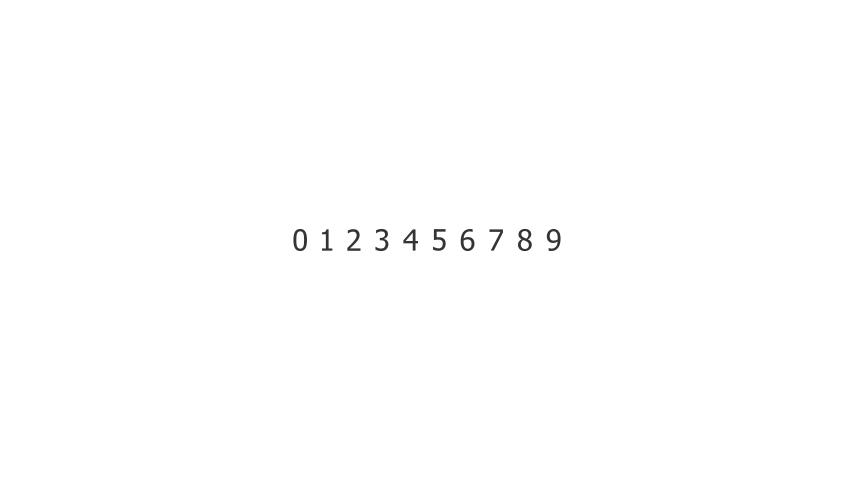

In [35]:
%%manim -ql Test
import random
class Test(Scene):
    config['tex_template']=TexTemplateLibrary.ctex
    def construct(self):
        vg = VGroup()
        
        vg = VGroup(*[Text(str(i)) for i in range(10)])
        vg.arrange()
        random.shuffle(vg)


        self.add(vg)

In [33]:
import random
tm = []
for i in range(20):
    tm.append(i)
random.shuffle(tm)
tm

[12, 17, 9, 14, 19, 2, 13, 6, 7, 18, 3, 16, 10, 1, 8, 4, 5, 11, 0, 15]